## 1. Data Preprocessing

## Overview

Practice for Data Analytic Class in Merdeka Belajar 

## Objecive

• Retrieving data 

• Cleansing, integrating
dan transforming data

• Data Preparation

• Exploratory Data
Analysis

• Data Visualization


**About Dataset**

The U.S. Census Bureau, in collaboration with five federal agencies, launched the Household Pulse Survey to produce data on the social and economic impacts of Covid-19 on American households. The Household Pulse Survey was designed to gauge the impact of the pandemic on employment status, consumer spending, food security, housing, education disruptions, and dimensions of physical and mental wellness.

The survey was designed to meet the goal of accurate and timely weekly estimates. It was conducted by an internet questionnaire, with invitations to participate sent by email and text message. The sample frame is the Census Bureau Master Address File Data. Housing units linked to one or more email addresses or cell phone numbers were randomly selected to participate, and one respondent from each housing unit was selected to respond for him or herself. Estimates are weighted to adjust for nonresponse and to match Census Bureau estimates of the population by age, gender, race and ethnicity, and educational attainment. All estimates shown meet the NCHS Data Presentation Standards for Proportions.

Dataset description & download https://www.kaggle.com/datasets/utkarshx27/mental-health-care

**1.1 Importing Library**

In [133]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

**1.2 Importing Dataset**

In [134]:
!gdown 1W7vyoi5OD1i7JGEjJ32xfFe0e3h4oXzE

Downloading...
From: https://drive.google.com/uc?id=1W7vyoi5OD1i7JGEjJ32xfFe0e3h4oXzE
To: /content/Mental_Health_Care_in_the_Last_4_Weeks.csv
100% 2.04M/2.04M [00:00<00:00, 134MB/s]


In [135]:
import pandas as pd
dataset = pd.read_csv('/content/Mental_Health_Care_in_the_Last_4_Weeks.csv')
dataset

,Indicator,Group,State,Subgroup,Phase,Time Period,Time Period Label,Time Period Start Date,Time Period End Date,Value,LowCI,HighCI,Confidence Interval,Quartile Range,Suppression Flag
0,Took Prescription Medication for Mental Health...,National Estimate,United States,United States,2,13,"Aug 19 - Aug 31, 2020",08/19/2020,08/31/2020,19.4,19.0,19.8,19.0 - 19.8,NaN,NaN
1,Took Prescription Medication for Mental Health...,By Age,United States,18 - 29 years,2,13,"Aug 19 - Aug 31, 2020",08/19/2020,08/31/2020,18.7,17.2,20.3,17.2 - 20.3,NaN,NaN
2,Took Prescription Medication for Mental Health...,By Age,United States,30 - 39 years,2,13,"Aug 19 - Aug 31, 2020",08/19/2020,08/31/2020,18.3,17.3,19.2,17.3 - 19.2,NaN,NaN
3,Took Prescription Medication for Mental Health...,By Age,United States,40 - 49 years,2,13,"Aug 19 - Aug 31, 2020",08/19/2020,08/31/2020,20.4,19.5,21.3,19.5 - 21.3,NaN,NaN
4,Took Prescription Medication for Mental Health...,By Age,United States,50 - 59 years,2,13,"Aug 19 - Aug 31, 2020",08/19/2020,08/31/2020,21.2,20.2,22.2,20.2 - 22.2,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10399,Needed Counseling or Therapy But Did Not Get I...,By State,Virginia,Virginia,3.4,45,"Apr 27 - May 9, 2022",04/27/2022,05/09/2022,10.1,7.1,13.8,7.1 - 13.8,9.6-11.3,NaN
10400,Needed Counseling or Therapy But Did Not Get I...,By State,Washington,Washington,3.4,45,"Apr 27 - May 9, 2022",04/27/2022,05/09/2022,14.8,12.5,17.4,12.5 - 17.4,13.0-20.8,NaN
10401,Needed Counseling or Therapy But Did Not Get I...,By State,West Virginia,West Virginia,3.4,45,"Apr 27 - May 9, 2022",04/27/2022,05/09/2022,9.8,6.6,13.8,6.6 - 13.8,9.6-11.3,NaN
10402,Needed Counseling or Therapy But Did Not Get I...,By State,Wisconsin,Wisconsin,3.4,45,"Apr 27 - May 9, 2022",04/27/2022,05/09/2022,11.6,8.5,15.3,8.5 - 15.3,11.4-12.9,NaN


## 2. Exploratory Data

gives information about 10404 rows and 15 columns

In [136]:
dataset.shape

(10404, 15)

provides information about the columns contained in these datasets

In [137]:
dataset.columns

Index(['Indicator', 'Group', 'State', 'Subgroup', 'Phase', 'Time Period',
       'Time Period Label', 'Time Period Start Date', 'Time Period End Date',
       'Value', 'LowCI', 'HighCI', 'Confidence Interval', 'Quartile Range',
       'Suppression Flag'],
      dtype='object')

provides information about the data types in these datasets which consist of objects, integers, and floats

In [139]:
dataset.dtypes

Indicator                  object
Group                      object
State                      object
Subgroup                   object
Phase                      object
Time Period                 int64
Time Period Label          object
Time Period Start Date     object
Time Period End Date       object
Value                     float64
LowCI                     float64
HighCI                    float64
Confidence Interval        object
Quartile Range             object
Suppression Flag          float64
dtype: object

provides information about the missing values ​​contained in this dataset and there are missing values, namely in the column value, LowCI, HighCI, Confidence Interval, Quartile Range, and Suppression Flag

In [70]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10404 entries, 0 to 10403
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Indicator               10404 non-null  object 
 1   Group                   10404 non-null  object 
 2   State                   10404 non-null  object 
 3   Subgroup                10404 non-null  object 
 4   Phase                   10404 non-null  object 
 5   Time Period             10404 non-null  int64  
 6   Time Period Label       10404 non-null  object 
 7   Time Period Start Date  10404 non-null  object 
 8   Time Period End Date    10404 non-null  object 
 9   Value                   9914 non-null   float64
 10  LowCI                   9914 non-null   float64
 11  HighCI                  9914 non-null   float64
 12  Confidence Interval     9914 non-null   object 
 13  Quartile Range          6732 non-null   object 
 14  Suppression Flag        22 non-null   

provides information about the categories in the column

In [71]:
dataset.nunique()

Indicator                    4
Group                       10
State                       52
Subgroup                    80
Phase                        8
Time Period                 34
Time Period Label           38
Time Period Start Date      38
Time Period End Date        38
Value                      439
LowCI                      406
HighCI                     486
Confidence Interval       7709
Quartile Range             500
Suppression Flag             1
dtype: int64

**2.1 Handling Missing Value**

Let's assume unknown value as missing value since unknown means not known or no values

provides information about the missing value and there are several columns that still contain missing value data

In [72]:
dataset.isnull().sum()

Indicator                     0
Group                         0
State                         0
Subgroup                      0
Phase                         0
Time Period                   0
Time Period Label             0
Time Period Start Date        0
Time Period End Date          0
Value                       490
LowCI                       490
HighCI                      490
Confidence Interval         490
Quartile Range             3672
Suppression Flag          10382
dtype: int64

provides information about the data type

In [73]:
dataset['Value'].dtypes

dtype('float64')

provides information about the data type

In [74]:
dataset['LowCI'].dtypes

dtype('float64')

provides information about the data type

In [75]:
dataset['HighCI'].dtypes

dtype('float64')

provides information about the data type

In [76]:
dataset['Confidence Interval'].dtypes

dtype('O')

provides information about the data type

In [77]:
dataset['Quartile Range'].dtypes

dtype('O')

provides information about the data type

In [78]:
dataset['Suppression Flag'].dtypes

dtype('float64')

Perform imputer to handle missing value in numerical data

eliminating missing values ​​using the mean strategy

In [79]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values= np.nan, strategy='mean')
imputer

SimpleImputer()

Eliminate datasets that contain missing values in the column

In [80]:
imputer = imputer.fit(dataset[['Value', 'LowCI', 'HighCI', 'Suppression Flag']])
imputer

SimpleImputer()

re-checking the missing values ​​in the dataset and there are no missing values ​​in the cleaned column

In [81]:
dataset[['Value', 'LowCI', 'HighCI', 'Suppression Flag']] = imputer.transform(dataset[['Value', 'LowCI', 'HighCI', 'Suppression Flag']])
dataset.isnull().sum()

Indicator                    0
Group                        0
State                        0
Subgroup                     0
Phase                        0
Time Period                  0
Time Period Label            0
Time Period Start Date       0
Time Period End Date         0
Value                        0
LowCI                        0
HighCI                       0
Confidence Interval        490
Quartile Range            3672
Suppression Flag             0
dtype: int64

Using drop column tohandle missing value on categorical or object data

In [83]:
dataset = dataset.dropna(axis=1)
dataset.isnull().sum()

Indicator                 0
Group                     0
State                     0
Subgroup                  0
Phase                     0
Time Period               0
Time Period Label         0
Time Period Start Date    0
Time Period End Date      0
Value                     0
LowCI                     0
HighCI                    0
Suppression Flag          0
dtype: int64

drop datetime column since we don't need it.

In [84]:
dataset = dataset.dropna(axis=1)
dataset

,Indicator,Group,State,Subgroup,Phase,Time Period,Time Period Label,Time Period Start Date,Time Period End Date,Value,LowCI,HighCI,Suppression Flag
0,Took Prescription Medication for Mental Health...,National Estimate,United States,United States,2,13,"Aug 19 - Aug 31, 2020",08/19/2020,08/31/2020,19.4,19.0,19.8,1.0
1,Took Prescription Medication for Mental Health...,By Age,United States,18 - 29 years,2,13,"Aug 19 - Aug 31, 2020",08/19/2020,08/31/2020,18.7,17.2,20.3,1.0
2,Took Prescription Medication for Mental Health...,By Age,United States,30 - 39 years,2,13,"Aug 19 - Aug 31, 2020",08/19/2020,08/31/2020,18.3,17.3,19.2,1.0
3,Took Prescription Medication for Mental Health...,By Age,United States,40 - 49 years,2,13,"Aug 19 - Aug 31, 2020",08/19/2020,08/31/2020,20.4,19.5,21.3,1.0
4,Took Prescription Medication for Mental Health...,By Age,United States,50 - 59 years,2,13,"Aug 19 - Aug 31, 2020",08/19/2020,08/31/2020,21.2,20.2,22.2,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10399,Needed Counseling or Therapy But Did Not Get I...,By State,Virginia,Virginia,3.4,45,"Apr 27 - May 9, 2022",04/27/2022,05/09/2022,10.1,7.1,13.8,1.0
10400,Needed Counseling or Therapy But Did Not Get I...,By State,Washington,Washington,3.4,45,"Apr 27 - May 9, 2022",04/27/2022,05/09/2022,14.8,12.5,17.4,1.0
10401,Needed Counseling or Therapy But Did Not Get I...,By State,West Virginia,West Virginia,3.4,45,"Apr 27 - May 9, 2022",04/27/2022,05/09/2022,9.8,6.6,13.8,1.0
10402,Needed Counseling or Therapy But Did Not Get I...,By State,Wisconsin,Wisconsin,3.4,45,"Apr 27 - May 9, 2022",04/27/2022,05/09/2022,11.6,8.5,15.3,1.0


## 3. Data Visualization

**Eploratory Data Analysis (EDA)**

we will not use exploratory data analysis like in the previous class, we'll take another apporach to visualize data

**3.1 Check Outliers**

Outliers are values at the extreme ends of a dataset.

Some outliers represent true values from natural variation in the population. Other outliers may result from incorrect data entry, equipment malfunctions, or other measurement errors.

An outlier isn’t always a form of dirty or incorrect data, so you have to be careful with them in data cleansing. What you should do with an outlier depends on its most likely cause.

for more info: https://www.scribbr.com/statistics/outliers/

provides mean and min information in the dataset

In [85]:
dataset.describe()

,Time Period,Value,LowCI,HighCI,Suppression Flag
count,10404.000000,10404.000000,10404.000000,10404.000000,10404.0
mean,28.134948,17.450736,14.771565,20.475661,1.0
std,11.040210,8.073437,7.476835,8.836755,0.0
min,1.000000,1.400000,0.800000,2.000000,1.0
25%,20.000000,10.500000,8.200000,13.100000,1.0
50%,29.000000,17.450736,14.771565,20.300000,1.0
75%,37.000000,23.700000,20.500000,27.000000,1.0
max,45.000000,62.900000,53.200000,71.900000,1.0


using a math plot to visualize n data and there are overlapping data and there are points that are far from the data below and these points are outliers that need to be cleaned

<Axes: >

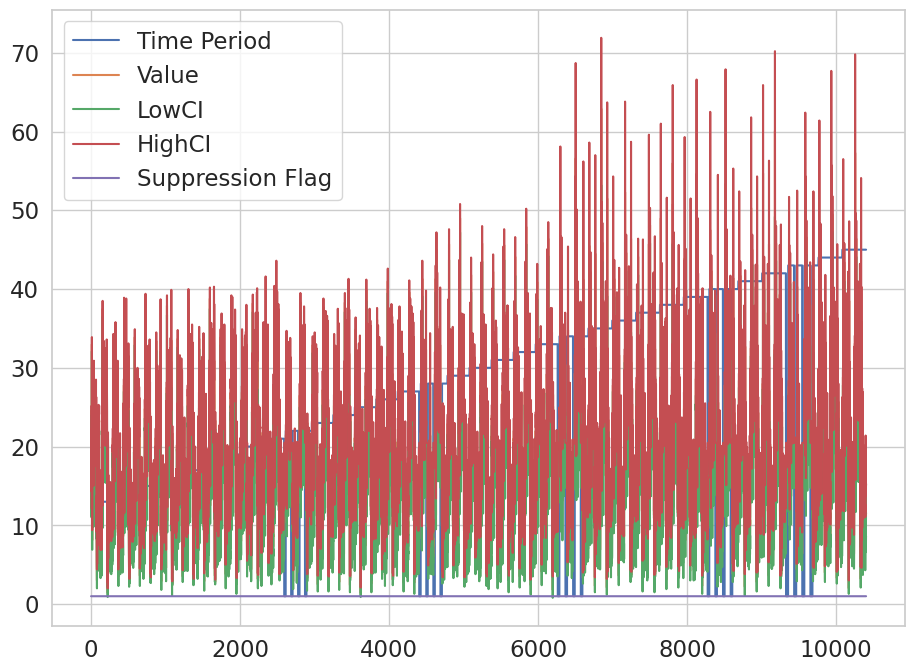

In [86]:
import matplotlib.pyplot as plt
%matplotlib inline
dataset.plot()

using a display, namely boxplot to display outliers data and obtained outliers data, namely value, LowCI, and HighCI

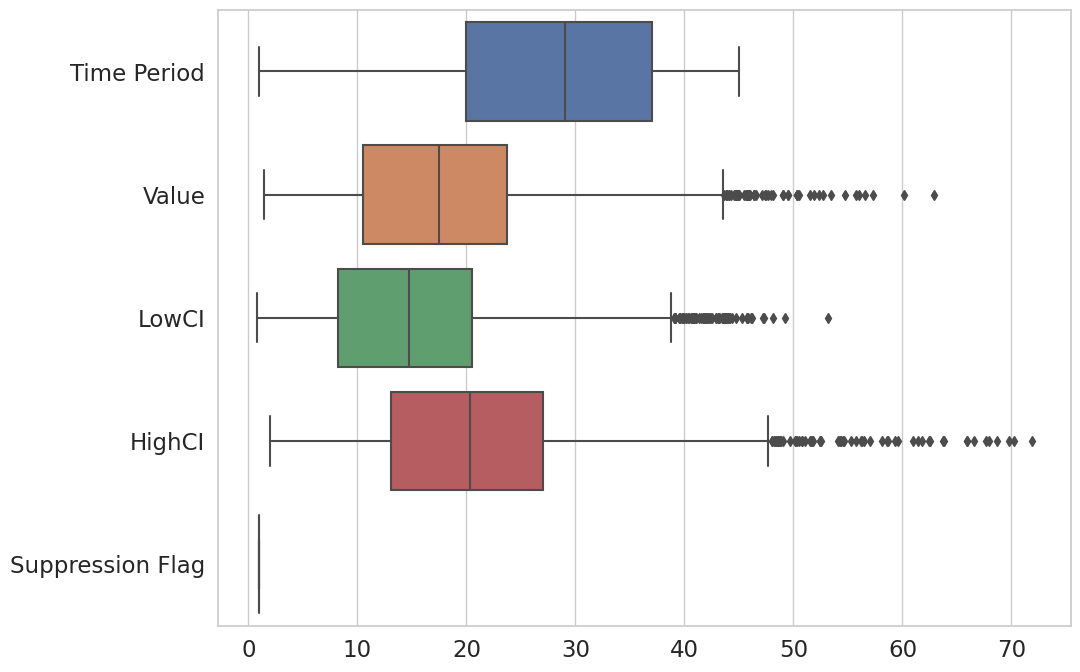

In [87]:
import seaborn as sns
%matplotlib inline

sns.set(rc={'figure.figsize':(11,8)}, font_scale=1.5, style='whitegrid')

# tips = sns.load_dataset(dataset)
sns.boxplot(data=dataset, orient="h");

using a display, namely Scatter plot to display outliers data and obtained outliers data, namely value, LowCI, and HighCI

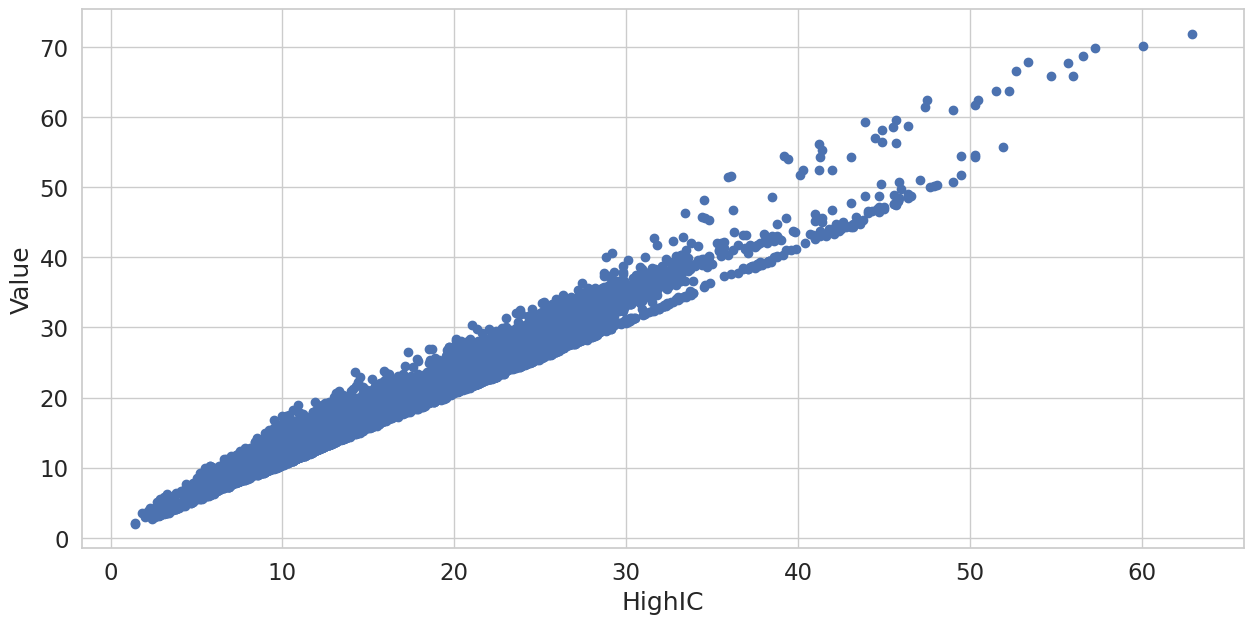

In [88]:
# Scatter plot
fig, ax = plt.subplots(figsize = (15,7))
ax.scatter(dataset['Value'], dataset['HighCI'])
 
# x-axis label
ax.set_xlabel('HighIC')
 
# y-axis label
ax.set_ylabel('Value')
plt.show()

**Removing the outliers using IQR**

**IQR (Inter Quartile Range)**

IQR = Quartile3 – Quartile1

Quartile description: https://rumusbilangan.com/rumus-kuartil/


IQR is interpolation method to remove outliers

To define the outlier base value is defined above and below datasets normal range namely Upper and Lower bounds, define the upper and the lower bound (1.5*IQR value is considered) :

upper = Q3 +1.5*IQR

lower = Q1 – 1.5*IQR

how to calculate IQR:

https://www.timesmojo.com/what-is-the-15-iqr-rule/

https://www.geeksforgeeks.org/detect-and-remove-the-outliers-using-python/

In the above formula as according to statistics, the 0.5 scale-up of IQR (new_IQR = IQR + 0.5*IQR) is taken, to consider all the data between 2.7 standard deviations in the Gaussian Distribution.

remove outliers using the quartile method with 25% Q1 and 75% Q3. and displays the amount of data before the outliers are cleaned and 10404 rows and 14 columns are obtained

In [91]:
import sklearn

#IQR Price
Q1 = np.percentile(dataset['Value'], 25,
                   method = 'midpoint')

Q3 = np.percentile(dataset['Value'], 75,
                   method = 'midpoint')
IQR = Q3 - Q1
 
print("Old Shape: ", dataset.shape)

Old Shape:  (10404, 13)


displays the amount of data after cleaning the outliers and 10342 rows and 13 columns are obtained

In [94]:
# Upper bound
upper = Q3 + 1.5 * IQR

# Lower bound
lower = Q1 - 1.5 * IQR

# Finding the indices of the outliers
outliers_upper = dataset[dataset['Value'] > upper].index
outliers_lower = dataset[dataset['Value'] < lower].index

# Concatenate the indices of the outliers
outliers = outliers_upper.append(outliers_lower)

# Removing the outliers
dataset.drop(outliers, inplace=True)

print("New Shape: ", dataset.shape)


New Shape:  (10342, 13)


displays the amount of data before cleaning the outliers and 10342 rows and 13 columns are obtained

In [95]:
import sklearn

# IQR Landsize
Q1 = np.percentile(dataset['HighCI'], 25,
                   method = 'midpoint')
 
Q3 = np.percentile(dataset['HighCI'], 75,
                   method = 'midpoint')
IQR = Q3 - Q1
 
print("Old Shape: ", dataset.shape)

Old Shape:  (10342, 13)


displays the amount of data after cleaning the outliers and 10327 rows and 13 columns are obtained

In [96]:
# Upper bound
upper = Q3 + 1.5 * IQR

# Lower bound
lower = Q1 - 1.5 * IQR

# Finding the indices of the outliers
outliers_upper = dataset[dataset['HighCI'] > upper].index
outliers_lower = dataset[dataset['HighCI'] < lower].index

# Concatenate the indices of the outliers
outliers = outliers_upper.append(outliers_lower)

# Removing the outliers
dataset.drop(outliers, inplace=True)

print("New Shape: ", dataset.shape)


New Shape:  (10327, 13)


displays the data using a boxplot whether the data has been cleaned of outliers and the cleaned data has no outliers

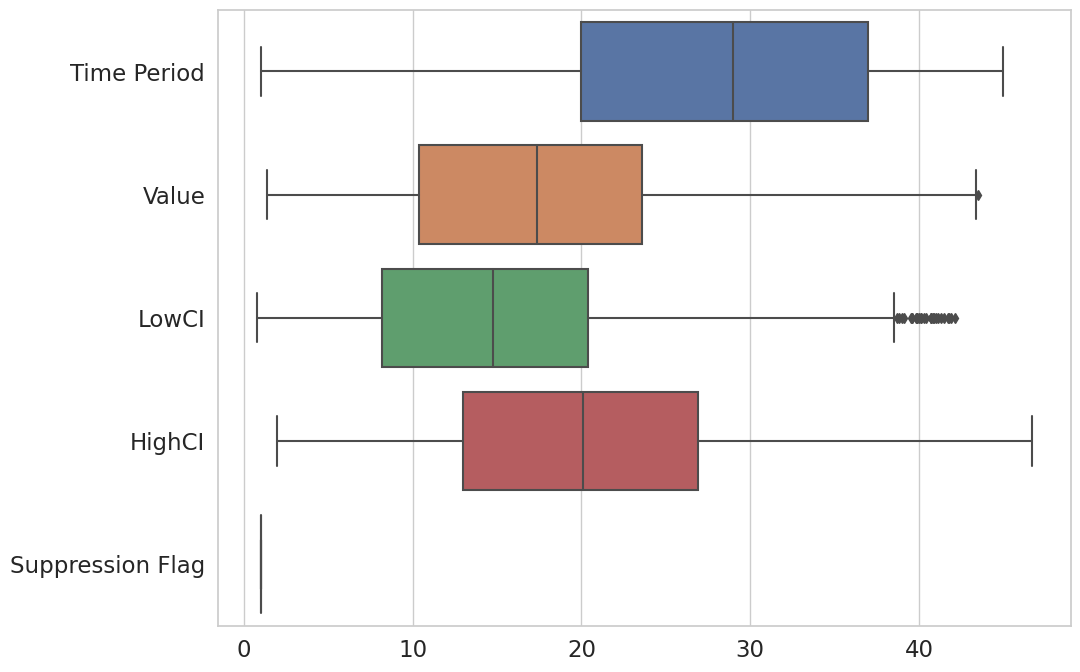

In [97]:
import seaborn as sns
%matplotlib inline

sns.set(rc={'figure.figsize':(11,8)}, font_scale=1.5, style='whitegrid')

# tips = sns.load_dataset(dataset)
sns.boxplot(data=dataset, orient="h");

displays data using a Scatter Plot whether the data has been cleaned of outliers and it is obtained that the cleaned data has no outliers

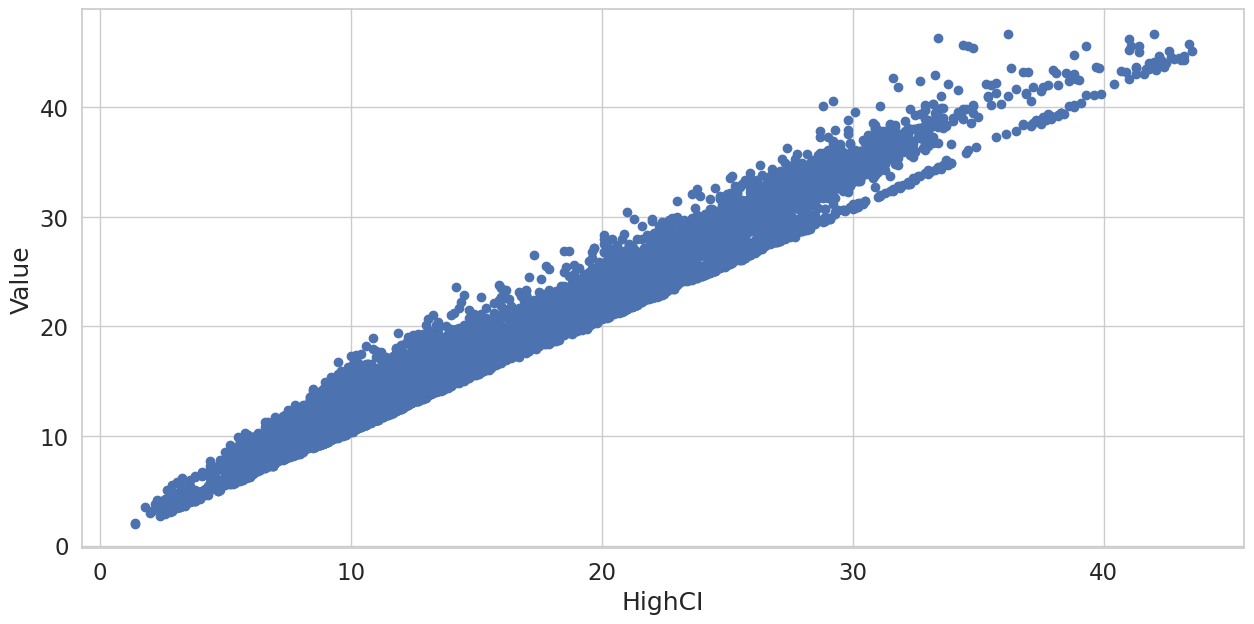

In [99]:
# Scatter plot
fig, ax = plt.subplots(figsize = (15,7))
ax.scatter(dataset['Value'], dataset['HighCI'])
 
# x-axis label
ax.set_xlabel('HighCI')
 
# y-axis label
ax.set_ylabel('Value')
plt.show()

Show data distribution based on histogram

use a bar chart to visualize the varied data in the column Time Period, Suppression Flag, LowCi, HighCI, and Value

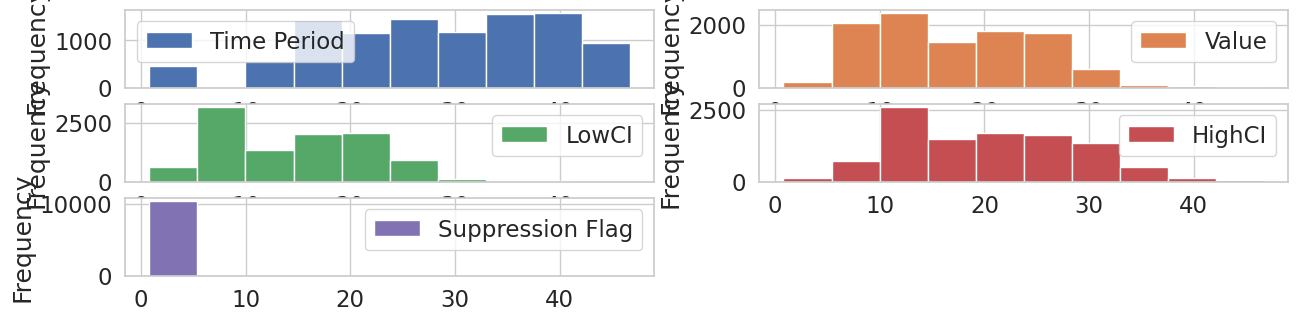

In [104]:
dataset.plot(kind='hist',subplots=True,layout=(10,2),figsize=(15,12), sharex=False)
plt.show()

use the line to visualize the data and get the data in the form of a signal

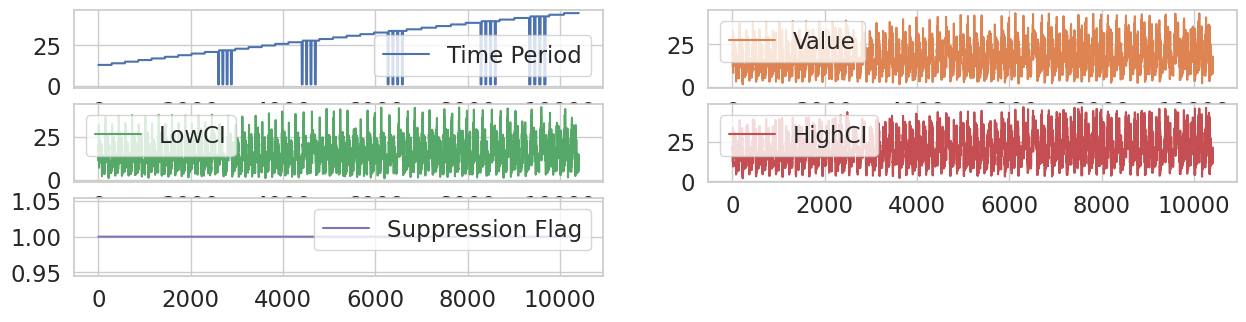

In [105]:
dataset.plot(kind='line',subplots=True,layout=(10,2),figsize=(15,12), sharex=False)
plt.show()

**3.2 CORRELATION MATRIX**

using a math plot to check the correlation matrix and on the diagonal line there is a bar chart which shows that it has a high correlation matrix because it is connected to its own column

/usr/local/lib/python3.10/dist-packages/pandas/plotting/_matplotlib/misc.py:101: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(boundaries_list[j])
/usr/local/lib/python3.10/dist-packages/pandas/plotting/_matplotlib/misc.py:102: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim(boundaries_list[i])
/usr/local/lib/python3.10/dist-packages/pandas/plotting/_matplotlib/misc.py:92: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(boundaries_list[i])


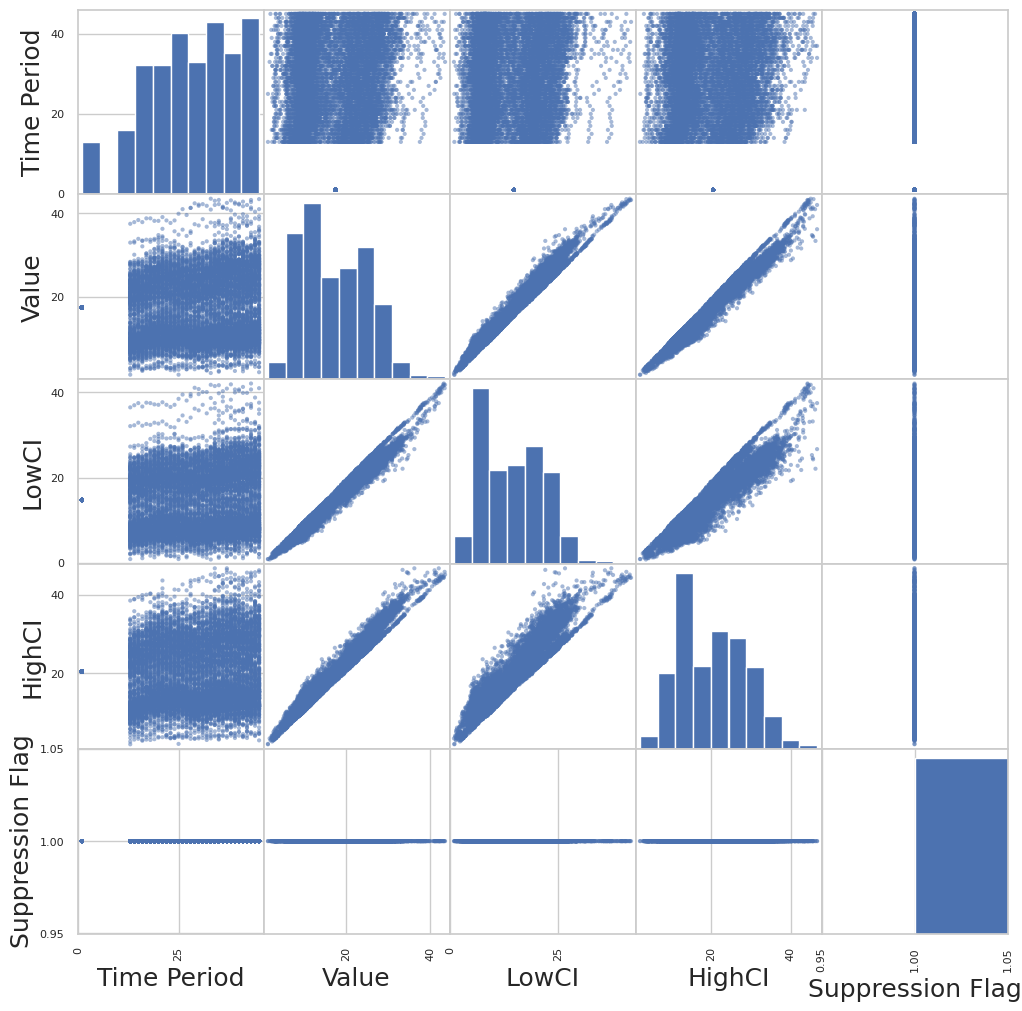

In [106]:
pd.plotting.scatter_matrix(dataset,figsize=(12,12))
plt.show()

correlation matrix with heatmap

use a heatmap to check the correlation matrix and get a green diagonal line and a value of 1 which indicates that it has a high correlation matrix and the red one has a value of 0.8 indicating a bad correlation

<ipython-input-107-4b443a21f68f>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = corr_data.corr()


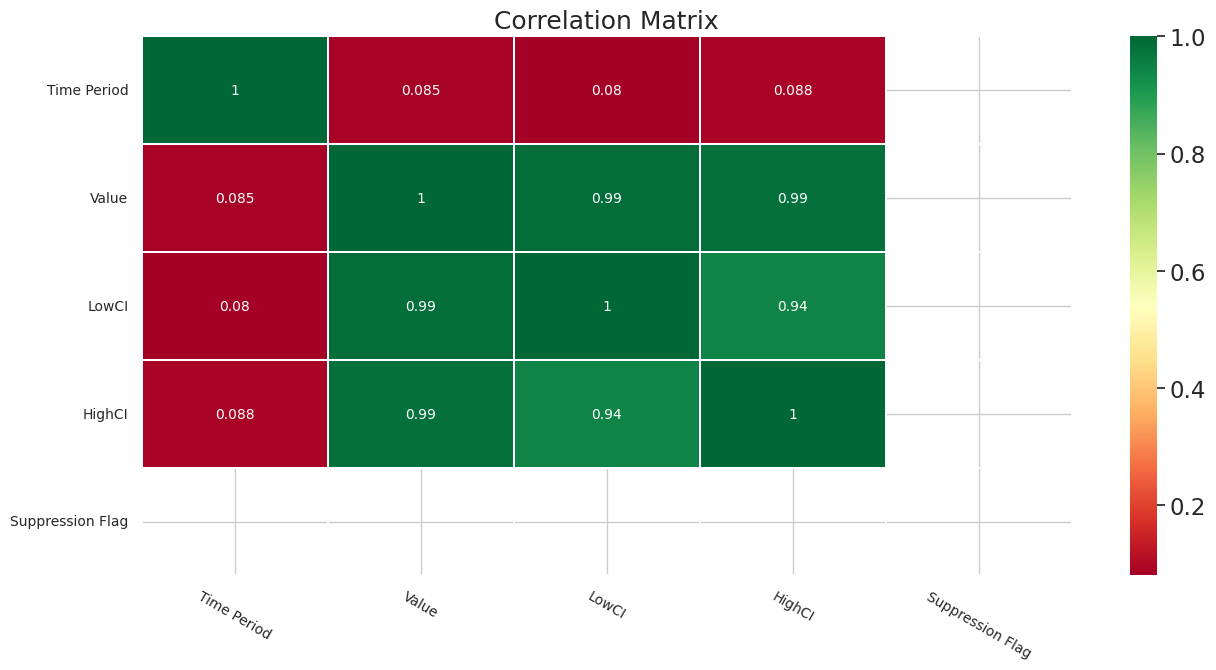

In [107]:
corr_data = dataset
corr = corr_data.corr()

cor_plot = sns.heatmap(corr,annot=True,cmap='RdYlGn',linewidths=0.2,annot_kws={'size':10})
fig=plt.gcf()
fig.set_size_inches(15,7)
plt.xticks(fontsize=10,rotation=-30)
plt.yticks(fontsize=10)
plt.title('Correlation Matrix')
plt.show()

**4. Splitting Dataset**

using the indicator column as a label

**4.1 Slicing**

We define x and y as x for data and y for label

In [108]:
x = dataset.drop('Indicator', axis=1)
x

,Group,State,Subgroup,Phase,Time Period,Time Period Label,Time Period Start Date,Time Period End Date,Value,LowCI,HighCI,Suppression Flag
0,National Estimate,United States,United States,2,13,"Aug 19 - Aug 31, 2020",08/19/2020,08/31/2020,19.4,19.0,19.8,1.0
1,By Age,United States,18 - 29 years,2,13,"Aug 19 - Aug 31, 2020",08/19/2020,08/31/2020,18.7,17.2,20.3,1.0
2,By Age,United States,30 - 39 years,2,13,"Aug 19 - Aug 31, 2020",08/19/2020,08/31/2020,18.3,17.3,19.2,1.0
3,By Age,United States,40 - 49 years,2,13,"Aug 19 - Aug 31, 2020",08/19/2020,08/31/2020,20.4,19.5,21.3,1.0
4,By Age,United States,50 - 59 years,2,13,"Aug 19 - Aug 31, 2020",08/19/2020,08/31/2020,21.2,20.2,22.2,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
10399,By State,Virginia,Virginia,3.4,45,"Apr 27 - May 9, 2022",04/27/2022,05/09/2022,10.1,7.1,13.8,1.0
10400,By State,Washington,Washington,3.4,45,"Apr 27 - May 9, 2022",04/27/2022,05/09/2022,14.8,12.5,17.4,1.0
10401,By State,West Virginia,West Virginia,3.4,45,"Apr 27 - May 9, 2022",04/27/2022,05/09/2022,9.8,6.6,13.8,1.0
10402,By State,Wisconsin,Wisconsin,3.4,45,"Apr 27 - May 9, 2022",04/27/2022,05/09/2022,11.6,8.5,15.3,1.0


Choose feature Type as a label

In [109]:
y = dataset["Indicator"]
y

0        Took Prescription Medication for Mental Health...
1        Took Prescription Medication for Mental Health...
2        Took Prescription Medication for Mental Health...
3        Took Prescription Medication for Mental Health...
4        Took Prescription Medication for Mental Health...
                               ...                        
10399    Needed Counseling or Therapy But Did Not Get I...
10400    Needed Counseling or Therapy But Did Not Get I...
10401    Needed Counseling or Therapy But Did Not Get I...
10402    Needed Counseling or Therapy But Did Not Get I...
10403    Needed Counseling or Therapy But Did Not Get I...
Name: Indicator, Length: 10327, dtype: object

In [110]:
y.values.reshape(-1,1)

array([['Took Prescription Medication for Mental Health, Last 4 Weeks'],
       ['Took Prescription Medication for Mental Health, Last 4 Weeks'],
       ['Took Prescription Medication for Mental Health, Last 4 Weeks'],
       ...,
       ['Needed Counseling or Therapy But Did Not Get It, Last 4 Weeks'],
       ['Needed Counseling or Therapy But Did Not Get It, Last 4 Weeks'],
       ['Needed Counseling or Therapy But Did Not Get It, Last 4 Weeks']],
      dtype=object)

**4.2 Categorical Encoding**

Choose One Hot Encoding or Label Encoding for perform categorical encoding

**One-Hot Encoding for data input x**

using one hot encoding to display numeric data with the condition that if 1 then there is data and if 0 then there is no data

In [111]:
x = pd.get_dummies(x)
x

,Time Period,Value,LowCI,HighCI,Suppression Flag,Group_By Age,Group_By Disability status,Group_By Education,Group_By Gender identity,Group_By Presence of Symptoms of Anxiety/Depression,...,Time Period End Date_09/28/2020,Time Period End Date_10/11/2021,Time Period End Date_10/12/2020,Time Period End Date_10/26/2020,Time Period End Date_11/09/2020,Time Period End Date_11/23/2020,Time Period End Date_11/30/2021,Time Period End Date_12/07/2020,Time Period End Date_12/13/2021,Time Period End Date_12/21/2020
0,13,19.4,19.0,19.8,1.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,13,18.7,17.2,20.3,1.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,13,18.3,17.3,19.2,1.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,13,20.4,19.5,21.3,1.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,13,21.2,20.2,22.2,1.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10399,45,10.1,7.1,13.8,1.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10400,45,14.8,12.5,17.4,1.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10401,45,9.8,6.6,13.8,1.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10402,45,11.6,8.5,15.3,1.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [112]:
x.shape

(10327, 269)

**4.2.1 Standarization**

Standardization is used on the data values that are normally distributed. Further, by applying standardization, we tend to make the mean of the dataset as 0 and the standard deviation equivalent to 1.

That is, by standardizing the values, we get the following statistics of the data distribution

mean = 0
standard deviation = 1

Thus, by this the data set becomes self explanatory and easy to analyze as the mean turns down to 0 and it happens to have an unit variance.

References: https://www.askpython.com/python/examples/standardize-data-in-python#:~:text=Ways%20to%20Standardize%20Data%20in%20Python%201%201.,load_iris%20...%202%202.%20Using%20StandardScaler%20%28%29%20function

displays data using the standard deviation

In [113]:
from sklearn.preprocessing import StandardScaler
std_scale = StandardScaler().fit_transform(x)
std_scale = pd.DataFrame(std_scale)

std_scale

,0,1,2,3,4,5,6,7,8,9,...,259,260,261,262,263,264,265,266,267,268
0,-1.364322,0.281518,0.614054,-0.050883,0.0,-0.338918,-0.119335,-0.250116,-0.10751,-0.172972,...,-0.169376,-0.177376,-0.169376,-0.169376,-0.169376,-0.169376,-0.094809,-0.169376,-0.177085,-0.169376
1,-1.364322,0.190508,0.363357,0.008959,0.0,2.950564,-0.119335,-0.250116,-0.10751,-0.172972,...,-0.169376,-0.177376,-0.169376,-0.169376,-0.169376,-0.169376,-0.094809,-0.169376,-0.177085,-0.169376
2,-1.364322,0.138502,0.377284,-0.122692,0.0,2.950564,-0.119335,-0.250116,-0.10751,-0.172972,...,-0.169376,-0.177376,-0.169376,-0.169376,-0.169376,-0.169376,-0.094809,-0.169376,-0.177085,-0.169376
3,-1.364322,0.411533,0.683692,0.128642,0.0,2.950564,-0.119335,-0.250116,-0.10751,-0.172972,...,-0.169376,-0.177376,-0.169376,-0.169376,-0.169376,-0.169376,-0.094809,-0.169376,-0.177085,-0.169376
4,-1.364322,0.515545,0.781185,0.236356,0.0,2.950564,-0.119335,-0.250116,-0.10751,-0.172972,...,-0.169376,-0.177376,-0.169376,-0.169376,-0.169376,-0.169376,-0.094809,-0.169376,-0.177085,-0.169376
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10322,1.535542,-0.927619,-1.043333,-0.768979,0.0,-0.338918,-0.119335,-0.250116,-0.10751,-0.172972,...,-0.169376,-0.177376,-0.169376,-0.169376,-0.169376,-0.169376,-0.094809,-0.169376,-0.177085,-0.169376
10323,1.535542,-0.316550,-0.291242,-0.338121,0.0,-0.338918,-0.119335,-0.250116,-0.10751,-0.172972,...,-0.169376,-0.177376,-0.169376,-0.169376,-0.169376,-0.169376,-0.094809,-0.169376,-0.177085,-0.169376
10324,1.535542,-0.966623,-1.112971,-0.768979,0.0,-0.338918,-0.119335,-0.250116,-0.10751,-0.172972,...,-0.169376,-0.177376,-0.169376,-0.169376,-0.169376,-0.169376,-0.094809,-0.169376,-0.177085,-0.169376
10325,1.535542,-0.732597,-0.848347,-0.589455,0.0,-0.338918,-0.119335,-0.250116,-0.10751,-0.172972,...,-0.169376,-0.177376,-0.169376,-0.169376,-0.169376,-0.169376,-0.094809,-0.169376,-0.177085,-0.169376


**4.2.2 Normalization**

A way to normalize the input features/variables is the Min-Max scaler. By doing so, all features will be transformed into the range [0,1] meaning that the minimum and maximum value of a feature/variable is going to be 0 and 1, respectively.

The main idea behind normalization/standardization is always the same. Variables that are measured at different scales do not contribute equally to the model fitting & model learned function and might end up creating a bias. Thus, to deal with this potential problem feature-wise normalization such as MinMax Scaling is usually used prior to model fitting.

reference : https://stackoverflow.com/questions/62178888/can-someone-explain-to-me-how-minmaxscaler-works


In [114]:
from sklearn.preprocessing import MinMaxScaler
x = MinMaxScaler().fit_transform(x)
x = pd.DataFrame(x)

x

,0,1,2,3,4,5,6,7,8,9,...,259,260,261,262,263,264,265,266,267,268
0,0.272727,0.427553,0.440678,0.398210,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.272727,0.410926,0.397094,0.409396,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.272727,0.401425,0.399516,0.384787,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.272727,0.451306,0.452785,0.431767,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.272727,0.470309,0.469734,0.451902,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10322,1.000000,0.206651,0.152542,0.263982,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10323,1.000000,0.318290,0.283293,0.344519,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10324,1.000000,0.199525,0.140436,0.263982,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10325,1.000000,0.242280,0.186441,0.297539,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**4.3 Splitting**

In [115]:
from sklearn.model_selection import train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(x, y, train_size=0.8, random_state=1, stratify=y)

In [116]:
from collections import Counter
print("Train distribution", Counter(yTrain))
print("Test distribution", Counter(yTest))

Train distribution Counter({'Received Counseling or Therapy, Last 4 Weeks': 2075, 'Needed Counseling or Therapy But Did Not Get It, Last 4 Weeks': 2074, 'Took Prescription Medication for Mental Health, Last 4 Weeks': 2067, 'Took Prescription Medication for Mental Health And/Or Received Counseling or Therapy, Last 4 Weeks': 2045})
Test distribution Counter({'Needed Counseling or Therapy But Did Not Get It, Last 4 Weeks': 519, 'Received Counseling or Therapy, Last 4 Weeks': 519, 'Took Prescription Medication for Mental Health, Last 4 Weeks': 517, 'Took Prescription Medication for Mental Health And/Or Received Counseling or Therapy, Last 4 Weeks': 511})


This stratify parameter makes a split so that the proportion of values in the sample produced will be the same as the proportion of values provided to parameter stratify.

For example, if variable y is a binary categorical variable with values 0 and 1 and there are 25% of zeros and 75% of ones, stratify=y will make sure that your random split has 25% of 0's and 75% of 1's.

For more: https://stackoverflow.com/questions/34842405/parameter-stratify-from-method-train-test-split-scikit-learn

Tugas praktekkan dengan dataset yg berbeda dari kaggle dan upload di github


In [118]:
from sklearn.linear_model import LogisticRegression

models = []
models.append(('LR', LogisticRegression()))

In [117]:
results_c = []
names_c = []

for name, model in models:
    # define how to split off validation data ('kfold' how many folds)
    kfold = KFold(n_splits=10)    
    # train the model
    cv_results = cross_val_score(model, xTrain, yTrain, cv=kfold, scoring='accuracy')    
    results_c.append(cv_results)
    names_c.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

LR: 0.589396 (0.015684)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [119]:
LR = LogisticRegression()
LR.fit(xTrain, yTrain)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [120]:
predictions = LR.predict(xTest)
print(accuracy_score(yTest, predictions))

0.5992255566311714


[[181 302  14  22]
 [206 293   9  11]
 [  2   9 385 115]
 [ 19   6 113 379]]


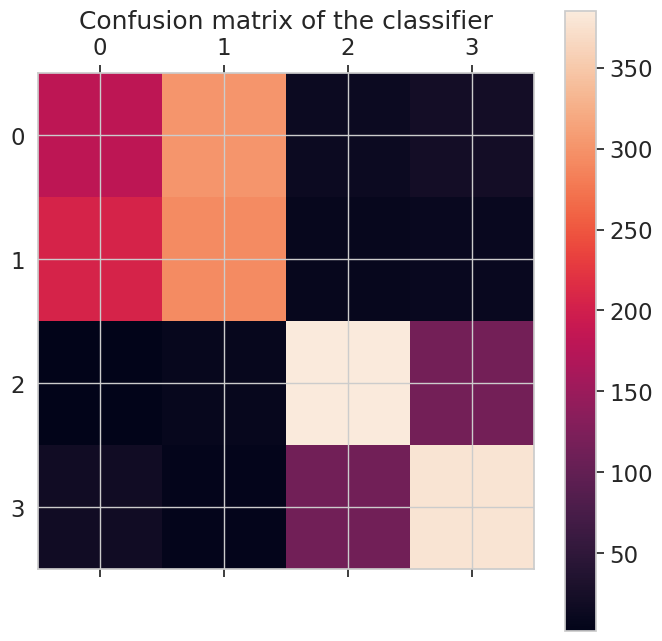

In [121]:
# Confusion Matrix 
from sklearn.metrics import confusion_matrix
import pylab as pl

print(confusion_matrix(yTest, predictions))

cm = confusion_matrix(yTest, predictions)
pl.matshow(cm)
pl.title('Confusion matrix of the classifier')
pl.colorbar()
pl.show()

In [122]:
# Classification Report
from sklearn.metrics import classification_report
print(classification_report(yTest, predictions))

                                                                                                    precision    recall  f1-score   support

                                     Needed Counseling or Therapy But Did Not Get It, Last 4 Weeks       0.44      0.35      0.39       519
                                                      Received Counseling or Therapy, Last 4 Weeks       0.48      0.56      0.52       519
Took Prescription Medication for Mental Health And/Or Received Counseling or Therapy, Last 4 Weeks       0.74      0.75      0.75       511
                                      Took Prescription Medication for Mental Health, Last 4 Weeks       0.72      0.73      0.73       517

                                                                                          accuracy                           0.60      2066
                                                                                         macro avg       0.60      0.60      0.60      2066
                  